In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')
pdf = df[['Survived','Fare']]
spdf = pdf.sort_values(by=['Fare'])

# plt.plot(df['Fare'], df['Survived'])
# a = spdf[spdf['Fare']>0]
# a.groupby(by = 'Fare').mean()
# plt.plot(a['Fare'], a['Survived'])

#spdf: sorted data i need
#a: grouped data with mean
spdf


,Survived,Fare
275,0,0.0000
478,0,0.0000
411,0,0.0000
594,0,0.0000
630,0,0.0000
...,...,...
27,0,263.0000
339,1,263.0000
733,1,512.3292
257,1,512.3292


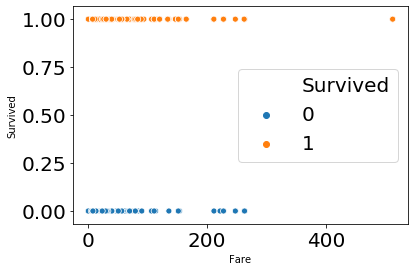

In [87]:
import seaborn as sns
%matplotlib inline
sns.scatterplot(x='Fare',y='Survived', hue='Survived',data = df)
#histogram, boxplot

In [88]:
# sns.scatterplot(x='Pclass',y='Fare',hue='Survived',data = df)

In [89]:
############

In [90]:
df = pd.read_csv('titanic.csv')
pdf = df[['Survived','Fare']]
spdf = pdf.sort_values(by=['Fare'])
spdf = spdf.reset_index(drop=True)
max_fare = spdf.iloc[len(spdf)-1:len(spdf)]['Fare']
result = pd.DataFrame()

bound_size = 28

In [91]:

for i in range((int)(1 + max_fare/bound_size)):
    lower_bound = i*bound_size
    upper_bound = lower_bound + bound_size
    bound_name = "[ " + str(lower_bound) + ", " + str(upper_bound) + ")"
        
    df_fare_in_bound = spdf[spdf['Fare']>=lower_bound]
    df_fare_in_bound = df_fare_in_bound[df_fare_in_bound['Fare'] < upper_bound]
    
    
    total_num = len(df_fare_in_bound)
    
    df_survive_in_bound = df_fare_in_bound[df_fare_in_bound['Survived'] == 1]
    survive_num = len(df_survive_in_bound)
    
#     print(i)
#     print(total_num)
#     print(survive_num)
#     print("***")
    
    if total_num == 0:
        result = result.append({'Index':lower_bound, 'Range': bound_name, 'Rate': -1}, ignore_index=True)
    
    else:
        survive_rate = survive_num / total_num
        #result[bound_name] = survive_rate

        result = result.append({'Index':lower_bound, 'Range': bound_name, 'Rate': survive_rate}, ignore_index=True)
pure_result = result[result['Rate'] != -1]  

/Users/sam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


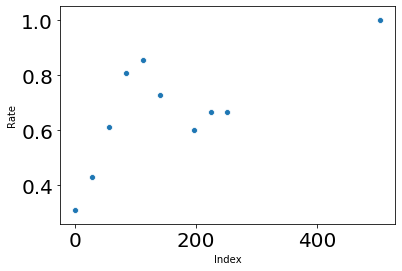

In [92]:
pure_result['Index'] = pure_result
import seaborn as sns
%matplotlib inline
sns.scatterplot(x = 'Index',y='Rate',data = pure_result)


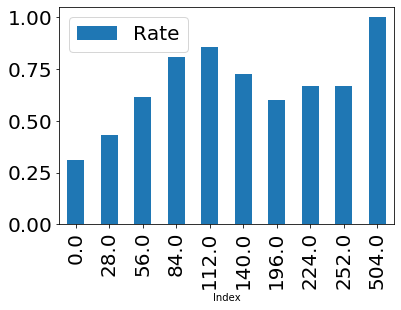

In [97]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# pure_result.hist(bins=20)
# spdf.hist(bins=20)

ax = pure_result.plot.bar(x='Index')

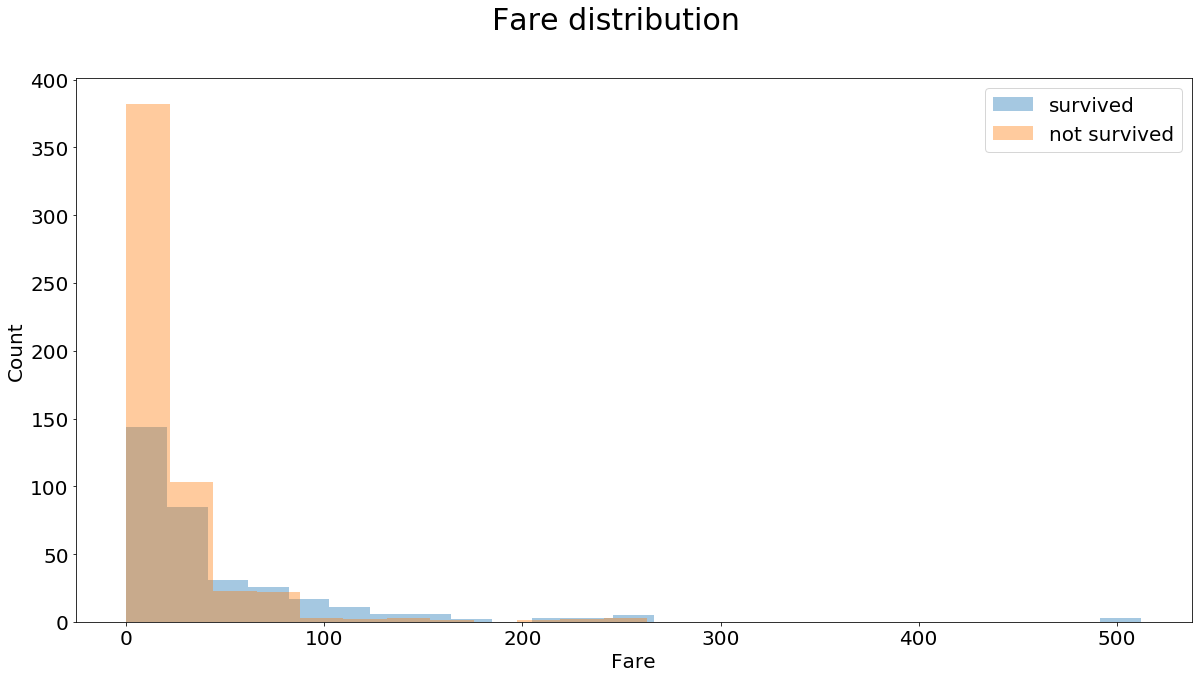

In [95]:
survived = 'survived'
not_survived = 'not survived'
fs = 20
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Fare distribution', fontsize=30)
plt.xlabel('Fare', fontsize=fs)
plt.ylabel('Count', fontsize=fs)
# plt.rc('xtick', labelsize=fs)
# plt.rc('ytick', labelsize=fs) 
plt.rc('legend', fontsize=fs) 
ax = sns.distplot(df[df['Survived']==1].Fare.dropna(), bins=25, label = survived, kde =False)
ax = sns.distplot(df[df['Survived']==0].Fare.dropna(), bins=12, label = not_survived, kde =False)
ax.legend()